# Parte I: Búsqueda y Análisis de Conjuntos de Datos

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Búsqueda de Conjuntos de Datos:
Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.


## 2.Análisis Exploratorio de Datos (EDA) Inicial:

### Data Set N°2 : Breast Cancer

In [ ]:
url = "https://gist.githubusercontent.com/ridhimasaxena/8c1551a77f1412ba1f0ceeb06c63eeae/raw/breastcancer.csv"
df_bc = pd.read_csv(url)

#### Análisis Exploratorio de Datos (EDA) Inicial:

In [ ]:
df_bc.head()
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       699 non-null    int64  
 1   Id               699 non-null    int64  
 2   Cl_thickness     699 non-null    int64  
 3   Cell_size        699 non-null    int64  
 4   Cell_shape       699 non-null    int64  
 5   Marg_adhesion    699 non-null    int64  
 6   Epith_c_size     699 non-null    int64  
 7   Bare_nuclei      683 non-null    float64
 8   Bl_cromatin      699 non-null    int64  
 9   Normal_nucleoli  699 non-null    int64  
 10  Mitoses          699 non-null    int64  
 11  Class            699 non-null    object 
dtypes: float64(1), int64(10), object(1)
memory usage: 65.7+ KB


In [ ]:
df_bc.drop(columns='Unnamed: 0', inplace=True)

In [ ]:
df_bc[df_bc.duplicated()]
df_bc = df_bc.drop_duplicates()

In [ ]:
df_bc[df_bc['Bare_nuclei'].isnull()]
df_bc.head()

df_bc['Bare_nuclei'].isnull().sum() #16 datos faltantes  de 699 16/699 -> corresponde al 2% de la muestra.
df_bc['Bare_nuclei'].value_counts() #no existe el valor 0. los datos faltanes los reemplazaré con 0.0

df_bc.loc[df_bc['Bare_nuclei'].isnull(), 'Bare_nuclei'] = 0

In [ ]:
df_bc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 691 entries, 0 to 698
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               691 non-null    int64  
 1   Cl_thickness     691 non-null    int64  
 2   Cell_size        691 non-null    int64  
 3   Cell_shape       691 non-null    int64  
 4   Marg_adhesion    691 non-null    int64  
 5   Epith_c_size     691 non-null    int64  
 6   Bare_nuclei      691 non-null    float64
 7   Bl_cromatin      691 non-null    int64  
 8   Normal_nucleoli  691 non-null    int64  
 9   Mitoses          691 non-null    int64  
 10  Class            691 non-null    object 
dtypes: float64(1), int64(9), object(1)
memory usage: 64.8+ KB


In [ ]:
df_bc.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,691.0,1.073333e+06,619295.297098,61634.0,872549.0,1171710.0,1238437.0,13454352.0
Cl_thickness,691.0,4.426918e+00,2.815861,1.0,2.0,4.0,6.0,10.0
Cell_size,691.0,3.130246e+00,3.041328,1.0,1.0,1.0,5.0,10.0
Cell_shape,691.0,3.201158e+00,2.959886,1.0,1.0,1.0,5.0,10.0
Marg_adhesion,691.0,2.824891e+00,2.866552,1.0,1.0,1.0,4.0,10.0
Epith_c_size,691.0,3.211288e+00,2.199852,1.0,2.0,2.0,4.0,10.0
Bare_nuclei,691.0,3.455861e+00,3.634657,0.0,1.0,1.0,5.0,10.0
Bl_cromatin,691.0,3.435601e+00,2.442345,1.0,2.0,3.0,5.0,10.0
Normal_nucleoli,691.0,2.882779e+00,3.066298,1.0,1.0,1.0,4.0,10.0
Mitoses,691.0,1.593343e+00,1.723129,1.0,1.0,1.0,1.0,10.0


#### Visualizaciones


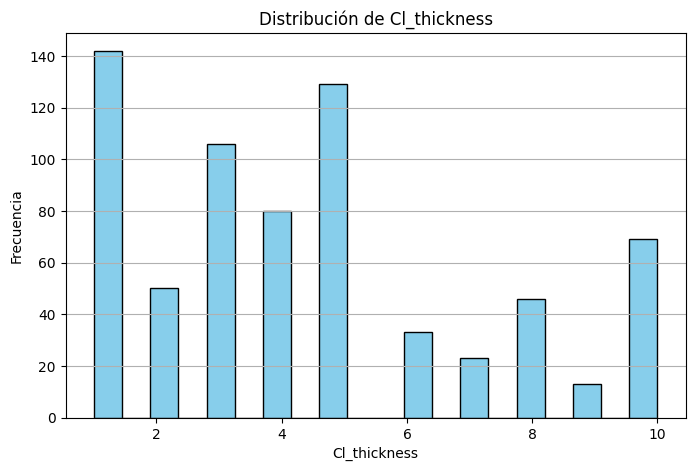

In [ ]:
#histograma que muestra cómo se concentran los valores de espesor.
plt.figure(figsize=(8, 5))
plt.hist(df_bc['Cl_thickness'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribución de Cl_thickness')
plt.xlabel('Cl_thickness')
plt.ylabel('Frecuencia')
plt.grid(axis='y')
plt.show()

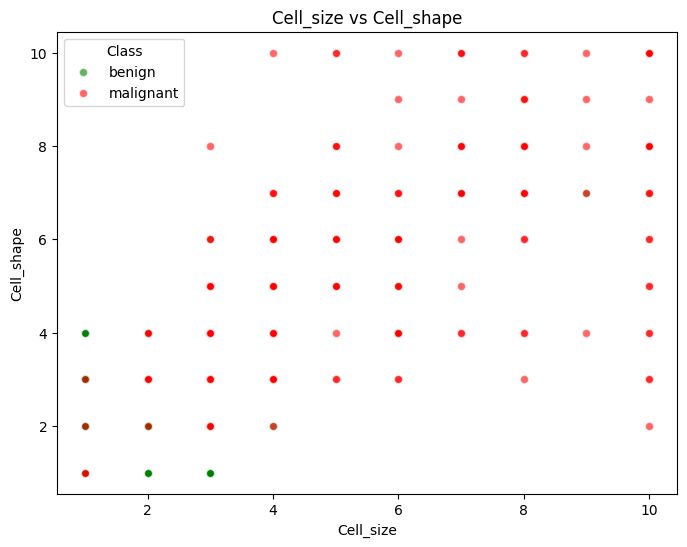

In [ ]:
#Relación entre Cell_size y Cell_shape, diferenciando tumores benignos y malignos.
plt.figure(figsize=(8, 6))

colors = {'malignant': 'red', 'benign': 'green'}

for clase in df_bc['Class'].unique():
    subset = df_bc[df_bc['Class'] == clase]
    plt.scatter(subset['Cell_size'], subset['Cell_shape'],
                c=colors[clase], label=clase,
                alpha=0.6, edgecolors='w')

plt.title('Cell_size vs Cell_shape')
plt.xlabel('Cell_size')
plt.ylabel('Cell_shape')
plt.legend(title='Class')
plt.show()

## Diagnóstico y Selección de Problema

Dataset N°2 : Breast Cancer ---> target: Class (binario) ---> clasificador  


Dado que el objetivo es predecir la clase del tumor (Class), que es una variable binaria (benigno o maligno) y el problema consiste en distinguir entre dos categorías, aplicar un modelo clasificador permite aprovechar las caracteristicas medicas medidas como Cell_size, Cell_shape o Cl_thickness, para detectar patrones y tomar decisiones y diagnósticos más precisos.